Original DataFrame:
   Age  Income  Gender Purchased
0   25   50000    Male        No
1   30   80000  Female       Yes
2   35   60000    Male        No
3   40   70000  Female       Yes
4  100  200000  Female       Yes

Statistical summary of the dataset:
              Age         Income
count   14.000000      14.000000
mean    50.000000   95000.000000
std     34.250211   69337.524528
min     25.000000   50000.000000
25%     31.250000   62500.000000
50%     40.000000   75000.000000
75%     48.750000   80000.000000
max    150.000000  300000.000000


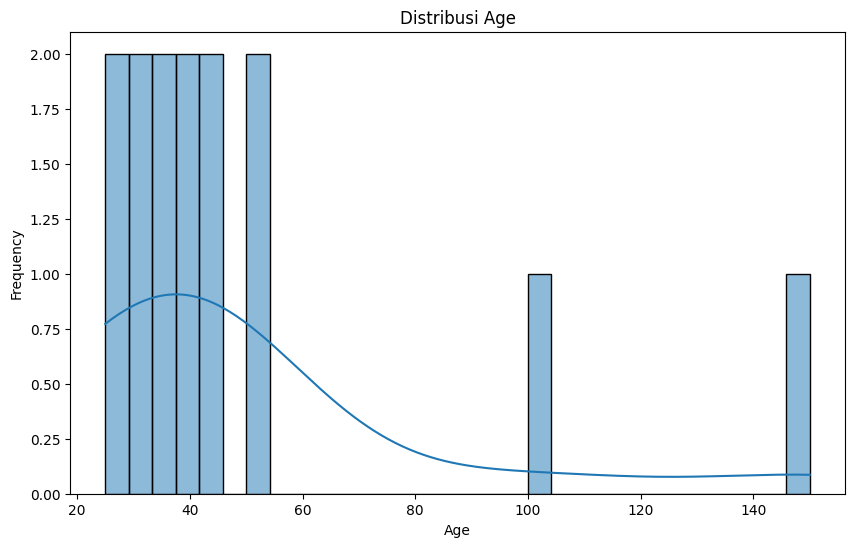

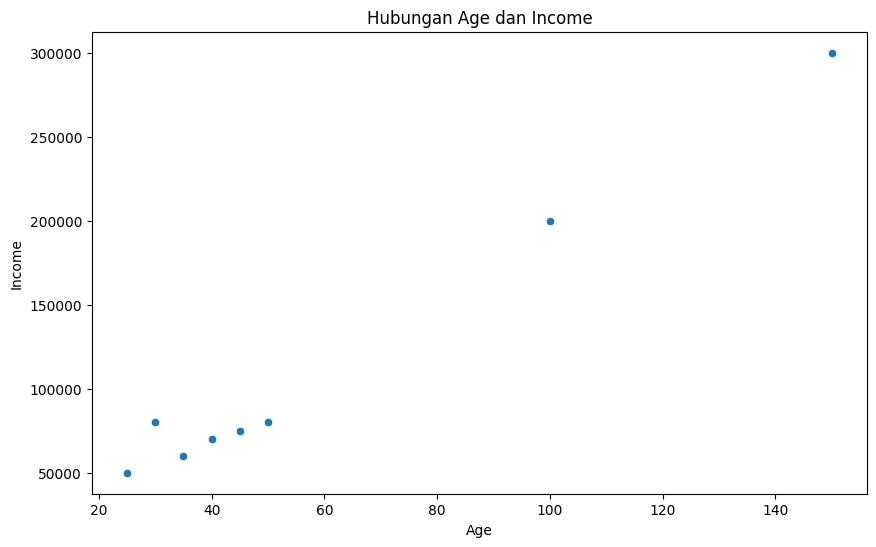

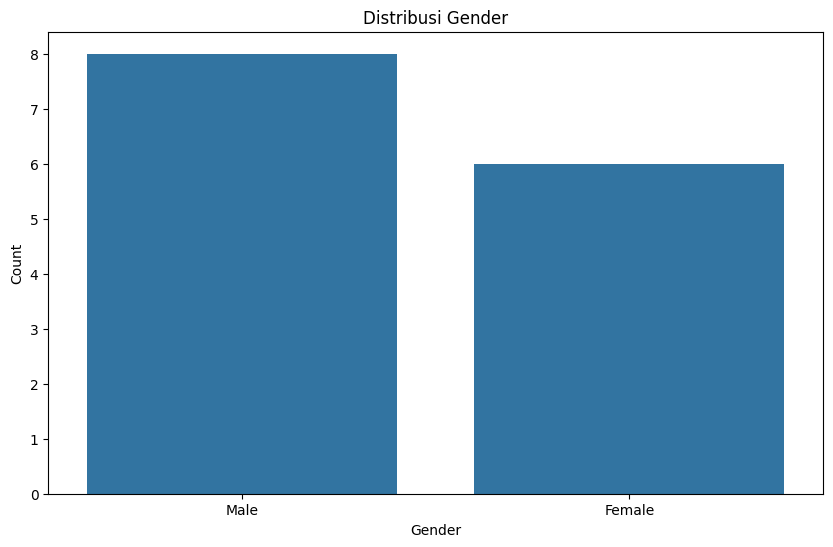


Model Performance:
Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
[[1 1]
 [0 1]]


C:\Users\galan\AppData\Local\Temp\ipykernel_14548\873237003.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\galan\AppData\Local\Temp\ipykernel_14548\873237003.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [1]:
# Contoh Implementasi Pengujian Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Membuat data sampel
data = {
    'Age': [25, 30, 35, 40, 100, 45, 50, 25, 30, 35, 40, 45, 50, 150],
    'Income': [50000, 80000, 60000, 70000, 200000, 75000, 80000, 50000, 80000, 60000, 70000, 75000, 80000, 300000],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'Purchased': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

# Membuat dataframe
df = pd.DataFrame(data)

# Menampilkan data sekilas
print("Original DataFrame:")
print(df.head())

# Eksplorasi Data
print("\nStatistical summary of the dataset:")
print(df.describe())

# Visualisasi Data
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Hubungan Age dan Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Menangani Missing Values dan Outliers
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

# Transformasi Data
X = df[['Age', 'Income', 'Gender']]
y = df['Purchased']

# Mengubah Data Kategorikal ke Numerik
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Gender'])], remainder='passthrough')
X = ct.fit_transform(X)

# Normalisasi Data
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training Model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Prediksi
y_pred = classifier.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
cm = confusion_matrix(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)